This notebook aims to relate COVID cases to pre-existing chronic diseases in the USA by looking at geographical correlations

Current risk factors used:
* Diabetes
* Heart disease

Note: need to control for other factors, like population density, social/economic demographics, etc.

# Datasets Used
* Covid county dataset from: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/ (accessed 11/16/20)
* 2017 Diabetes county dataset from: https://gis.cdc.gov/grasp/diabetes/DiabetesAtlas.html
* 2015-2017 heart disease hospitalization by county from: https://nccd.cdc.gov/DHDSPAtlas/?state=County
    * for medicare recipients (age >65), rate per 1000


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Datasets

In [2]:
#Load covid dataset
USAFACTS_DIR = 'USAFacts_Covid_by_county/'
COUNTY_CASES_FILENAME = USAFACTS_DIR + 'covid_confirmed_usafacts.csv'
COUNTY_DEATHS_FILENAME = USAFACTS_DIR + 'covid_deaths_usafacts.csv'
COUNTY_POP_FILENAME = USAFACTS_DIR + 'covid_county_population_usafacts.csv'

county_cases = pd.read_csv(COUNTY_CASES_FILENAME) #covid cases by county
county_deaths = pd.read_csv(COUNTY_DEATHS_FILENAME) #covid deaths by county
county_pop = pd.read_csv(COUNTY_POP_FILENAME) #population of counties

In [3]:
#load diabetes dataset
DIABETES_DIR = 'Diabetes_by_county/'
DIABETES_FILENAME = DIABETES_DIR + 'DiabetesAtlasCountyData.csv'

county_diabetes = pd.read_csv(DIABETES_FILENAME, skiprows = 2, skipfooter = 1)



<ipython-input-3-f300fab7663d>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  county_diabetes = pd.read_csv(DIABETES_FILENAME, skiprows = 2, skipfooter = 1)


In [4]:
#load heart disease datasets
HEART_DIR = 'CDC_Heartdisease_by_county/'
HEART_FILENAME = HEART_DIR + 'Total_Cardiovascular_Disease_Hospitalization_Rate_per_1000_Medicare_Beneficiaries_65plus_All_Races_Ethnicities_Both_Genders_2015to2017.csv'


county_heart = pd.read_csv(HEART_FILENAME)

In [5]:
#county_cases is a pandas.DataFrame that holds cumulative covid cases per county on daily basis, since 1/22/20

county_cases

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,2242,2267,2283,2304,2328,2351,2385,2417,2435,2456
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,7134,7188,7226,7263,7348,7409,7454,7523,7596,7646
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,1090,1092,1095,1098,1107,1112,1113,1117,1123,1128
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,917,924,926,932,948,961,966,973,978,986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,681,692,726,776,869,869,944,991,1075,1075
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,922,932,977,1007,1025,1025,1066,1108,1178,1178
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,542,544,551,568,627,627,664,686,729,729
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,185,185,187,190,199,199,203,206,218,218


In [6]:
#county_deaths is pandas.DataFrame that follows same format as county_cases

county_deaths

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,30,30,30,30,30,32,32,36,36,36
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,83,83,83,83,84,84,84,84,84,84
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,15,16,16,16,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7


In [7]:
county_pop

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394
...,...,...,...,...
3190,56037,Sweetwater County,WY,42343
3191,56039,Teton County,WY,23464
3192,56041,Uinta County,WY,20226
3193,56043,Washakie County,WY,7805


In [8]:
#the 2017 diabetes rate by county -- percentage is between 0 and 100

county_diabetes

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
0,Bedford City,Virginia,51515,No Data,No Data,No Data
1,Shannon County,South Dakota,46113,No Data,No Data,No Data
2,Wrangell-Petersburg Census Area,Alaska,2280,No Data,No Data,No Data
3,Wade Hampton Census Area,Alaska,2270,No Data,No Data,No Data
4,Skagway-Hoonah-Angoon,Alaska,2232,No Data,No Data,No Data
...,...,...,...,...,...,...
3221,Jones County,North Carolina,37103,24.7,12.8,41.6
3222,Woodruff County,Arkansas,5147,25.3,11.4,46.8
3223,Bullock County,Alabama,1011,27.9,14.9,43.7
3224,Nowata County,Oklahoma,40105,27.9,14,44.3


## Preprocess and clean datasets

### Diabetes dataset

In [30]:
county_diabetes.head()

,countyFIPS,Diabetes_Percentage,Diabetes_Lower Limit,Diabetes_ Upper Limit
0,51515,NaN,NaN,NaN
1,46113,NaN,NaN,NaN
2,2280,NaN,NaN,NaN
3,2270,NaN,NaN,NaN
4,2232,NaN,NaN,NaN


In [9]:
temp = county_diabetes.drop(['County','State'], axis = 1) #redundant info, only need CountyFIPS for identification

#rename columns
cols = list(temp.columns)
cols[0] = 'countyFIPS' #rename to match column name in covid dataset
cols[1:] = ['Diabetes_' + c for c in cols[1:]]
temp.columns = cols #rename columns so that it's clear that they came from diabetes dataset
temp.iloc[:,1:] = temp.iloc[:,1:].apply(lambda col: pd.to_numeric(col, errors='coerce', downcast = 'float'), axis = 1) #convert to numeric datatype
county_diabetes = temp

county_diabetes

### Cardiovascular dataset

In [11]:
#preview before cleaning
county_heart.head()

,"OBJECTID,N,10,0","cnty_fips,C,7","state_name,C,26","state_fips,C,2","cnty_name,C,32","state_abbr,C,2","Value,N,19,11","Shape_Leng,N,19,11","Shape_Area,N,19,11"
0,1,2013,Alaska,2,Aleutians East,AK,-1.0,24.266646,2.235582
1,2,2016,Alaska,2,Aleutians West,AK,-1.0,18.731621,0.889389
2,3,2020,Alaska,2,Anchorage,AK,45.3,4.166792,0.767578
3,4,2050,Alaska,2,Bethel,AK,43.2,50.346854,18.093880
4,5,2060,Alaska,2,Bristol Bay,AK,37.5,2.525155,0.205927


In [27]:
#only get relevant columns, give them relevant names
temp = county_heart.iloc[:,[1,-3]]
temp.columns = ['countyFIPS', 'Heart_Hospitalizations']

#put NaNs in the rows with -1 (no data)
temp = temp.replace(-1, np.NaN)

#initially in rate per 1000, so divide it to be a percent
temp['Heart_Hospitalizations'] /= 1000

county_heart = temp

county_heart

,countyFIPS,Heart_Hospitalizations
0,2013,NaN
1,2016,NaN
2,2020,0.0453
3,2050,0.0432
4,2060,0.0375
...,...,...
3221,72151,0.0400
3222,72153,0.0533
3223,78010,0.0534
3224,78020,0.0404


## Join covid dataset with chronic disease datasets

Previous section should have resulted in ready-to-use datasets for joining with covid dataset!

Note: work on reducing memory size of dataframes by downsizing big dtypes into smaller dtypes -- may be issue in future

Note: clean up code

Note: try looking at map/GIS libraries, see about overlaying the data onto map of USA

In [32]:
def merge_all(df, on = 'countyFIPS'):
    '''
    helper function to merge df with all useful datasets
    '''
    all_datasets = [county_diabetes, county_heart]
    
    merged_df = df
    
    for dataset in all_datasets:
        merged_df = merged_df.merge(dataset, how = 'left', on = on)
    
    return merged_df

### Covid cases

In [28]:
#convert flat number of county cases to rate over county population

#first merge population with cases data using countyFIPS
county_cases_rate = pd.merge(county_pop.drop(['County Name', 'State'], axis=1), county_cases, on = 'countyFIPS')

#then convert number of cases to rate over county population
county_cases_rate.iloc[:, 5:] = county_cases_rate.iloc[:, 5:].apply(lambda col: col / county_cases_rate['population'], axis = 0)
county_cases_rate

,countyFIPS,population,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,0,0,Statewide Unallocated,AL,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,Statewide Unallocated,AK,2,NaN,NaN,NaN,NaN,NaN,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2,0,0,Statewide Unallocated,AZ,4,NaN,NaN,NaN,NaN,NaN,...,inf,NaN,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,Statewide Unallocated,AR,5,NaN,NaN,NaN,NaN,NaN,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
4,0,0,Statewide Unallocated,CA,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,56037,42343,Sweetwater County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.016083,0.016343,0.017146,0.018327,0.020523,0.020523,0.022294,0.023404,0.025388,0.025388
5690,56039,23464,Teton County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.039294,0.039720,0.041638,0.042917,0.043684,0.043684,0.045431,0.047221,0.050205,0.050205
5691,56041,20226,Uinta County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.026797,0.026896,0.027242,0.028083,0.031000,0.031000,0.032829,0.033917,0.036043,0.036043
5692,56043,7805,Washakie County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.023703,0.023703,0.023959,0.024343,0.025496,0.025496,0.026009,0.026393,0.027931,0.027931


In [38]:
main_cases_df = merge_all(county_cases_rate)
main_cases_df

,countyFIPS,population,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,Diabetes_Percentage,Diabetes_Lower Limit,Diabetes_ Upper Limit,Heart_Hospitalizations
0,0,0,Statewide Unallocated,AL,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,Statewide Unallocated,AK,2,NaN,NaN,NaN,NaN,NaN,...,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN
2,0,0,Statewide Unallocated,AZ,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,Statewide Unallocated,AR,5,NaN,NaN,NaN,NaN,NaN,...,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN
4,0,0,Statewide Unallocated,CA,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,56037,42343,Sweetwater County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.020523,0.020523,0.022294,0.023404,0.025388,0.025388,8.0,6.6,9.9,0.0591
5690,56039,23464,Teton County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.043684,0.043684,0.045431,0.047221,0.050205,0.050205,2.2,1.3,3.2,0.0335
5691,56041,20226,Uinta County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.031000,0.031000,0.032829,0.033917,0.036043,0.036043,9.5,7.1,12.3,0.0529
5692,56043,7805,Washakie County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.025496,0.025496,0.026009,0.026393,0.027931,0.027931,8.2,5.5,12.2,0.0354


In [42]:
#check examples where there is data missing for only 1 of the datasets
#ideally, shouldn't be very many
len(main_cases_df[main_cases_df['Diabetes_Percentage'].isna() ^ main_cases_df['Heart_Hospitalizations'].isna()])

16

In [47]:
#check for correlation between diabetes percentage and covid cases

correlation_cases = main_cases_df.drop(['countyFIPS', 'stateFIPS'], axis = 1).corr().iloc[:, -4:]
correlation_cases

,Diabetes_Percentage,Diabetes_Lower Limit,Diabetes_ Upper Limit,Heart_Hospitalizations
population,-0.091600,0.093800,-0.210898,-0.001406
1/22/20,-0.014613,0.001933,-0.022569,-0.015364
1/23/20,-0.014613,0.001933,-0.022569,-0.015364
1/24/20,-0.016609,0.005532,-0.027997,-0.011514
1/25/20,-0.016609,0.005532,-0.027997,-0.011514
...,...,...,...,...
11/15/20,0.113413,0.082076,0.101669,-0.037497
Diabetes_Percentage,1.000000,0.826828,0.857917,0.448985
Diabetes_Lower Limit,0.826828,1.000000,0.436664,0.411475
Diabetes_ Upper Limit,0.857917,0.436664,1.000000,0.359387


c:\users\david\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Correlation between Risk Factor and Covid Cases')

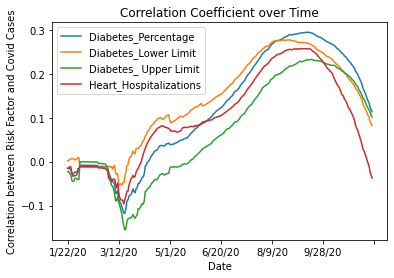

In [49]:
#graph the correlation coefficient over time between diabetes rate and covid cases

correlation_cases.iloc[1:-4,:].plot(kind='line')
plt.title('Correlation Coefficient over Time')
plt.xlabel('Date')
plt.ylabel('Correlation between Risk Factor and Covid Cases')

hmm -- based on correlation table, it seems that there's either no correlation or very weak between COVID cases and diabetes; but what about COVID deaths and diabetes?

Also, check out urban/rural disparity -- may shed some light on if there's interaction effects with diabetes

Now that it's by covid rate vs diabetes rate, there is actually a positive correlation (albeit weak)

Possible confounding variable: maybe counties with high diabetes rate are less prone to healthy behavior? didn't follow covid safety guidelines?

### Covid deaths

In [51]:
#now look at county deaths vs diabetes

county_deaths_rate = pd.merge(county_pop.drop(['County Name', 'State'], axis=1), county_deaths, on = 'countyFIPS')

#then convert number of cases to rate over county population
county_deaths_rate.iloc[:, 5:] = county_deaths_rate.iloc[:, 5:].apply(lambda col: col / county_deaths_rate['population'], axis = 0)
county_deaths_rate

,countyFIPS,population,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,0,0,Statewide Unallocated,AL,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,Statewide Unallocated,AK,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,Statewide Unallocated,AZ,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,inf,inf,NaN,NaN,NaN,NaN
3,0,0,Statewide Unallocated,AR,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,Statewide Unallocated,CA,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,56037,42343,Sweetwater County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000094,0.000094,0.000094,0.000094,0.000094,0.000094,0.000094,0.000094,0.000094,0.000094
5690,56039,23464,Teton County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
5691,56041,20226,Uinta County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148
5692,56043,7805,Washakie County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000897,0.000897,0.000897,0.000897,0.000897,0.000897,0.000897,0.000897,0.000897,0.000897


In [52]:
main_deaths_df = merge_all(county_deaths_rate)
main_deaths_df

,countyFIPS,population,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,Diabetes_Percentage,Diabetes_Lower Limit,Diabetes_ Upper Limit,Heart_Hospitalizations
0,0,0,Statewide Unallocated,AL,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,Statewide Unallocated,AK,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,Statewide Unallocated,AZ,4,NaN,NaN,NaN,NaN,NaN,...,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,Statewide Unallocated,AR,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,Statewide Unallocated,CA,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,56037,42343,Sweetwater County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000094,0.000094,0.000094,0.000094,0.000094,0.000094,8.0,6.6,9.9,0.0591
5690,56039,23464,Teton County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,2.2,1.3,3.2,0.0335
5691,56041,20226,Uinta County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148,9.5,7.1,12.3,0.0529
5692,56043,7805,Washakie County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000897,0.000897,0.000897,0.000897,0.000897,0.000897,8.2,5.5,12.2,0.0354


In [54]:
correlation_deaths = main_deaths_df.drop(['countyFIPS','stateFIPS'],axis=1).corr().iloc[:, -4:]
correlation_deaths

,Diabetes_Percentage,Diabetes_Lower Limit,Diabetes_ Upper Limit,Heart_Hospitalizations
population,-0.091600,0.093800,-0.210898,-0.001406
1/22/20,NaN,NaN,NaN,NaN
1/23/20,NaN,NaN,NaN,NaN
1/24/20,NaN,NaN,NaN,NaN
1/25/20,NaN,NaN,NaN,NaN
...,...,...,...,...
11/15/20,0.236617,0.159830,0.241606,0.174184
Diabetes_Percentage,1.000000,0.826828,0.857917,0.448985
Diabetes_Lower Limit,0.826828,1.000000,0.436664,0.411475
Diabetes_ Upper Limit,0.857917,0.436664,1.000000,0.359387


c:\users\david\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Correlation between Diabetes and Covid Deaths')

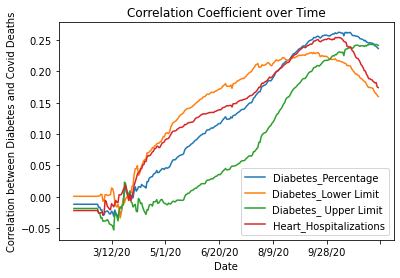

In [56]:
#graph the correlation coefficient over time between diabetes rate and covid deaths

correlation_deaths.iloc[1:-4,:].plot(kind='line')
plt.title('Correlation Coefficient over Time')
plt.xlabel('Date')
plt.ylabel('Correlation between Diabetes and Covid Deaths')

Whoa! really obvious positive correlation between diabetes rate and covid deaths!

Still should look out for confounding variables

## Output useful data

may want to use data in other notebooks, ie for modeling

In [ ]:
import os

OUTPUT_DIR = 'output/'
os.mkdir(OUTPUT_DIR)

main_cases_df.to_csv(OUTPUT_DIR + 'county_cases_risks.csv', na_rep='NaN')
main_deaths_df.to_csv(OUTPUT_DIR + 'county_deaths_risks.csv', na_rep = 'NaN')

## Modeling

Try to see if model can predict covid cases from diabetes rate -- if so, then data may have substance

In [57]:
#try doing tensorflow stuff on google collab -- my dinky laptop can't handle it

ModuleNotFoundError: No module named 'tensorflow'